In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
tv_shows = pd.read_csv('/content/drive/MyDrive/Dataset/streamingservice_analysis.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [14]:
tv_shows.drop_duplicates(subset='Title',keep='first',inplace=True)

In [17]:
def clean_rotten_tomatoes(x):
    if isinstance(x, str):
        if '/' in x:
            return x.split('/')[0]  # Take the first number before the slash
        return x.rstrip('%')
    return x

def clean_imdb(x):
    if isinstance(x, str):
        return x.split('/')[0]  # Take the first number before the slash
    return x

# Clean Rotten Tomatoes
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(clean_rotten_tomatoes)
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

# Clean IMDb
tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb'].apply(clean_imdb)
tv_shows['IMDb'] = pd.to_numeric(tv_shows['IMDb'], errors='coerce')
tv_shows['IMDb'] = tv_shows['IMDb'] * 10
tv_shows['IMDb'] = tv_shows['IMDb'].round().astype('Int64')  # Use Int64 to

In [18]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [21]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')

# Create a list of columns to drop
columns_to_drop = ['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type']

# Only drop columns that exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in tv_shows_combined.columns]
tv_shows_combined.drop(columns=existing_columns, inplace=True)

<Axes: xlabel='StreamingOn'>

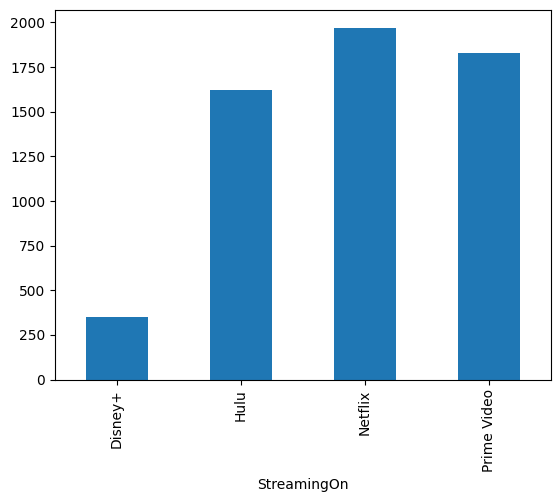

In [22]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [23]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [24]:
px.scatter(tv_shows_both_ratings, x='IMDb',y='Rotten Tomatoes',color='StreamingOn')